In [108]:
# Please ensure that execution role has full access to Textract, Comprehent and Translate

In [109]:
!pip install boto3
!pip install image
import boto3
from IPython.display import Image, display
#from trp import Document
#import Image as PImage, ImageDraw
from PIL import Image as PImage, ImageDraw
import time
from IPython.display import IFrame

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [110]:
# Curent AWS Region. Use this to choose corresponding S3 bucket with sample content

mySession = boto3.session.Session()
awsRegion = mySession.region_name

In [111]:
# S3 bucket that contains sample documents

# We are providing sample documents in this bucket so
# you do not have to manually download/upload test documents.
account_id = boto3.client('sts').get_caller_identity()["Account"]
s3BucketName = "sagemaker-" + awsRegion + "-"+account_id
print(s3BucketName)
#s3BucketName ="sagemaker-us-east-1-135151577600"

sagemaker-us-east-2-135151577600


In [112]:
# Amazon S3 client
s3 = boto3.client('s3')

# Amazon Textract client
textract = boto3.client('textract')

# 1. Detect text from S3 object

https://docs.aws.amazon.com/textract/latest/dg/API_DetectDocumentText.html

In [116]:
# Document
documentName = "textract/SampleLiabilityInsuranceForm.png"

In [117]:
display(Image(url=s3.generate_presigned_url('get_object', Params={'Bucket': s3BucketName, 'Key': documentName})))

In [118]:
# Call Amazon Textract
response = textract.detect_document_text(
    Document={
        'S3Object': {
            'Bucket': s3BucketName,
            'Name': documentName
        }
    })


# Print detected text
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print (item["Text"])

ACORD. CERTIFICATE OF LIABILITY INSURANCE
DATE MM cory
00/00/00
PRODUCER
THIS CERTIFICATE is ISSULD AS A MATTER OF INFORMATION
Your Agent or Broker
ONLY AND CONFERS NO RIGHTS UPON THE CERTIFICATE
HOLDER THIS CERTIFICATE DOES NOT AMEND. EXTEND OR
ALTER THE COVERAGE AFFORDED BY THE POLICIES BELOW
Address
City, State Zip
INSURERS AFFORDING COVERAGE
INSURED
Your Company Name
INSURERA
Your insurance Company
INSURER @
Address
INSURERC
City, State Zip
INSURER D:
INSURER
COVERAGES
THE POLICIES OF INSURANCE LISTED BELOW HAVE BEEN ISSUED TO THE INSURED NAMED ABOVE FOR THE POLICY PERIOD INDICATED NOTWITHST ANDING
ANY REGUIREMENT TERM OR CONDITION OF ANY CONTRACT OR OTHER DOCUMENT WITH RESPECT TO WHICH THIS CERTIFICATE MAY st ISSUED OR
MAY
PERT. AIN. THE INSURANCE AFFORDED BY THE POLICHS DESCRIBED HEREN is SUBJECT TO ALL THE TERMS EXCLUSIONS AND CONDITIONS OF SUCH
POLICIES AGGREGATE LIMITS SHOWN MAY HAVE BEEN REDUCED BY PAID CLAIMS
INSURANCE
POLIOY NUMBER
BATE
LIMITS
A
GENERAL
Your Policy No.
00/0

## Lines and Words of Text - JSON Structure

https://docs.aws.amazon.com/textract/latest/dg/API_BoundingBox.html

https://docs.aws.amazon.com/textract/latest/dg/text-location.html

https://docs.aws.amazon.com/textract/latest/dg/how-it-works-lines-words.html

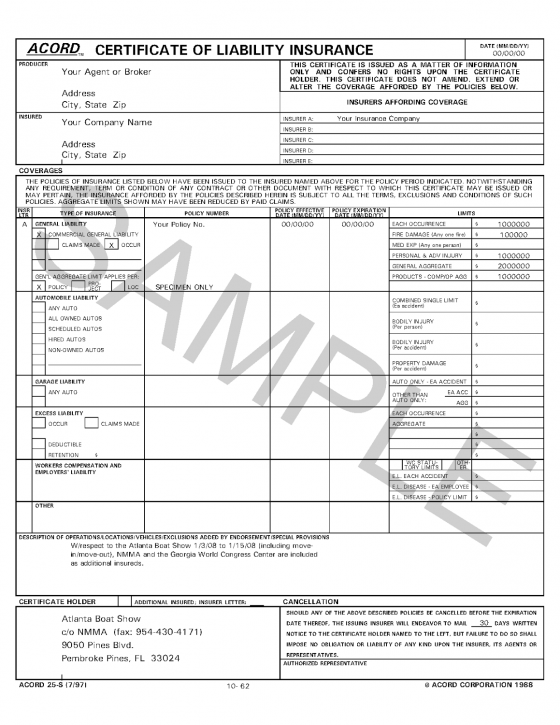

ACORD. CERTIFICATE OF LIABILITY INSURANCE
DATE MM cory
00/00/00
PRODUCER
THIS CERTIFICATE is ISSULD AS A MATTER OF INFORMATION
Your Agent or Broker
ONLY AND CONFERS NO RIGHTS UPON THE CERTIFICATE
HOLDER THIS CERTIFICATE DOES NOT AMEND. EXTEND OR
ALTER THE COVERAGE AFFORDED BY THE POLICIES BELOW
Address
City, State Zip
INSURERS AFFORDING COVERAGE
INSURED
Your Company Name
INSURERA
Your insurance Company
INSURER @
Address
INSURERC
City, State Zip
INSURER D:
INSURER
COVERAGES
THE POLICIES OF INSURANCE LISTED BELOW HAVE BEEN ISSUED TO THE INSURED NAMED ABOVE FOR THE POLICY PERIOD INDICATED NOTWITHST ANDING
ANY REGUIREMENT TERM OR CONDITION OF ANY CONTRACT OR OTHER DOCUMENT WITH RESPECT TO WHICH THIS CERTIFICATE MAY st ISSUED OR
MAY
PERT. AIN. THE INSURANCE AFFORDED BY THE POLICHS DESCRIBED HEREN is SUBJECT TO ALL THE TERMS EXCLUSIONS AND CONDITIONS OF SUCH
POLICIES AGGREGATE LIMITS SHOWN MAY HAVE BEEN REDUCED BY PAID CLAIMS
INSURANCE
POLIOY NUMBER
BATE
LIMITS
A
GENERAL
Your Policy No.
00/0

In [119]:
# Document
display(Image(filename=documentName))
# Read document content
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

# Call Amazon Textract
response = textract.detect_document_text(Document={'Bytes': imageBytes})

# Print detected text
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print (item["Text"])

In [120]:
print("JSON Response\n===================")
display(response)

JSON Response


{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 1.0,
     'Height': 0.9993103742599487,
     'Left': 0.0,
     'Top': 0.0},
    'Polygon': [{'X': 1.5854802411375396e-16, 'Y': 0.0},
     {'X': 1.0, 'Y': 0.0},
     {'X': 1.0, 'Y': 0.9993103742599487},
     {'X': 0.0, 'Y': 0.9993103742599487}]},
   'Id': '0ee26fe7-9711-48bf-9710-f4eb82e22925',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['927c6cea-d19b-4121-ac1a-17cf7cfcdcfa',
      '67b4567f-0dd7-4a76-8b7d-98235c7b8a3e',
      'e3ffa61d-92aa-4f8f-b784-07e9c202c6a7',
      '6663bbc0-f3e8-49af-8407-19698f125948',
      'f4cc09f4-6188-4e7c-a327-14ce46003ae1',
      'cb51f47a-793b-4397-99e6-d06ce3b201ce',
      'a62c6840-3811-4140-9423-58bb0e7be960',
      '3e8375c7-2be5-4982-b3e0-7bcf92d071ee',
      'ac3025f3-cef0-4f49-97fa-1f51f42b69f5',
      '4ca551e3-4977-4fcb-8dcc-26b8c0b4b35d',
      '9649e3ec-23c7-40dc-9051-9428d96b8d2e',
      '93674504-62c4-433e-a039-a005a1844bfb

# 3. Reading order

In [121]:
display(Image(url=s3.generate_presigned_url('get_object', Params={'Bucket': s3BucketName, 'Key': documentName})))

In [122]:
# Call Amazon Textract
response = textract.detect_document_text(
    Document={
        'S3Object': {
            'Bucket': s3BucketName,
            'Name': documentName
        }
    })

#print(response)

# Detect columns and print lines
columns = []
lines = []
for item in response["Blocks"]:
      if item["BlockType"] == "LINE":
        column_found=False
        for index, column in enumerate(columns):
            bbox_left = item["Geometry"]["BoundingBox"]["Left"]
            bbox_right = item["Geometry"]["BoundingBox"]["Left"] + item["Geometry"]["BoundingBox"]["Width"]
            bbox_centre = item["Geometry"]["BoundingBox"]["Left"] + item["Geometry"]["BoundingBox"]["Width"]/2
            column_centre = column['left'] + column['right']/2

            if (bbox_centre > column['left'] and bbox_centre < column['right']) or (column_centre > bbox_left and column_centre < bbox_right):
                #Bbox appears inside the column
                lines.append([index, item["Text"]])
                column_found=True
                break
        if not column_found:
            columns.append({'left':item["Geometry"]["BoundingBox"]["Left"], 'right':item["Geometry"]["BoundingBox"]["Left"] + item["Geometry"]["BoundingBox"]["Width"]})
            lines.append([len(columns)-1, item["Text"]])

lines.sort(key=lambda x: x[0])
for line in lines:
    print (line[1])

ACORD. CERTIFICATE OF LIABILITY INSURANCE
PRODUCER
Your Agent or Broker
Address
City, State Zip
INSURED
Your Company Name
INSURERA
INSURER @
Address
INSURERC
City, State Zip
INSURER D:
INSURER
COVERAGES
THE POLICIES OF INSURANCE LISTED BELOW HAVE BEEN ISSUED TO THE INSURED NAMED ABOVE FOR THE POLICY PERIOD INDICATED NOTWITHST ANDING
ANY REGUIREMENT TERM OR CONDITION OF ANY CONTRACT OR OTHER DOCUMENT WITH RESPECT TO WHICH THIS CERTIFICATE MAY st ISSUED OR
MAY
PERT. AIN. THE INSURANCE AFFORDED BY THE POLICHS DESCRIBED HEREN is SUBJECT TO ALL THE TERMS EXCLUSIONS AND CONDITIONS OF SUCH
POLICIES AGGREGATE LIMITS SHOWN MAY HAVE BEEN REDUCED BY PAID CLAIMS
INSURANCE
POLIOY NUMBER
BATE
GENERAL
Your Policy No.
00/00/00
00/00/00
DENERAL
CLAMS MADE
X
OCCUM
OENT ADCREGATE LIMIT APPL PER
X
PRO
FOLICY
2101
LOC
SPECIMEN ONLY
LIABRITY
ANY AUTO
ALL OWNED AUTOS
SCHEDULED AUTOS
AUTOS
NON-OWNED AUTOS
BARAGE LIABRITY
MY AUTO
Excess LAABLITY
OCCUA
CLAIMS MADE
DEDUCTIBLE
RETENTION
WORKERS COMPENSATION AND
E

# 4. Natural Language Processing

In [123]:
display(Image(url=s3.generate_presigned_url('get_object', Params={'Bucket': s3BucketName, 'Key': documentName})))

In [124]:
# Call Amazon Textract
response = textract.detect_document_text(
    Document={
        'S3Object': {
            'Bucket': s3BucketName,
            'Name': documentName
        }
    })

#print(response)

# Print text
print("\nText\n========")
text = ""
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print ('\033[94m' +  item["Text"] + '\033[0m')
        text = text + " " + item["Text"]

# Amazon Comprehend client
comprehend = boto3.client('comprehend')

# Detect sentiment
sentiment =  comprehend.detect_sentiment(LanguageCode="en", Text=text)
print ("\nSentiment\n========\n{}".format(sentiment.get('Sentiment')))

# Detect entities
entities =  comprehend.detect_entities(LanguageCode="en", Text=text)
print("\nEntities\n========")
for entity in entities["Entities"]:
    print ("{}\t=>\t{}".format(entity["Type"], entity["Text"]))


Text
ACORD. CERTIFICATE OF LIABILITY INSURANCE
DATE MM cory
00/00/00
PRODUCER
THIS CERTIFICATE is ISSULD AS A MATTER OF INFORMATION
Your Agent or Broker
ONLY AND CONFERS NO RIGHTS UPON THE CERTIFICATE
HOLDER THIS CERTIFICATE DOES NOT AMEND. EXTEND OR
ALTER THE COVERAGE AFFORDED BY THE POLICIES BELOW
Address
City, State Zip
INSURERS AFFORDING COVERAGE
INSURED
Your Company Name
INSURERA
Your insurance Company
INSURER @
Address
INSURERC
City, State Zip
INSURER D:
INSURER
COVERAGES
THE POLICIES OF INSURANCE LISTED BELOW HAVE BEEN ISSUED TO THE INSURED NAMED ABOVE FOR THE POLICY PERIOD INDICATED NOTWITHST ANDING
ANY REGUIREMENT TERM OR CONDITION OF ANY CONTRACT OR OTHER DOCUMENT WITH RESPECT TO WHICH THIS CERTIFICATE MAY st ISSUED OR
MAY
PERT. AIN. THE INSURANCE AFFORDED BY THE POLICHS DESCRIBED HEREN is SUBJECT TO ALL THE TERMS EXCLUSIONS AND CONDITIONS OF SUCH
POLICIES AGGREGATE LIMITS SHOWN MAY HAVE BEEN REDUCED BY PAID CLAIMS
INSURANCE
POLIOY NUMBER
BATE
LIMITS
A
GENERAL
Your Policy No

# 5. Translate

In [125]:
display(Image(url=s3.generate_presigned_url('get_object', Params={'Bucket': s3BucketName, 'Key': documentName})))

In [126]:
# Call Amazon Textract
response = textract.detect_document_text(
    Document={
        'S3Object': {
            'Bucket': s3BucketName,
            'Name': documentName
        }
    })

#print(response)

# Amazon Translate client
translate = boto3.client('translate')

print ('')
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print ('\033[94m' +  item["Text"] + '\033[0m')
        result = translate.translate_text(Text=item["Text"], SourceLanguageCode="en", TargetLanguageCode="fr")
        print ('\033[92m' + result.get('TranslatedText') + '\033[0m')
    print ('')



ACORD. CERTIFICATE OF LIABILITY INSURANCE
ACORD. CERTIFICAT D'ASSURANCE RESPONSABILITÉ

DATE MM cory
DATE MM cory

00/00/00
00/00/00

PRODUCER
PRODUCTEUR

THIS CERTIFICATE is ISSULD AS A MATTER OF INFORMATION
CE CERTIFICAT EST ISSULD EN TANT QUE QUESTION D'INFORMATION

Your Agent or Broker
Votre agent ou courtier

ONLY AND CONFERS NO RIGHTS UPON THE CERTIFICATE
SEULEMENT ET NE CONFÈRE AUCUN DROIT SUR LE CERTIFICAT

HOLDER THIS CERTIFICATE DOES NOT AMEND. EXTEND OR
TITULAIRE DE CE CERTIFICAT NE MODIFIE PAS. ÉTENDRE OU

ALTER THE COVERAGE AFFORDED BY THE POLICIES BELOW
MODIFIER LA COUVERTURE OFFERTE PAR LES POLICES CI-DESSOUS

Address
Adresse

City, State Zip
Ville, État Zip

INSURERS AFFORDING COVERAGE
ASSUREURS OFFRANT UNE PROTECTION

INSURED
ASSURÉ

Your Company Name
Nom de votre entreprise

INSURERA
INSURERA

Your insurance Company
Votre compagnie d'assurance

INSURER @
ASSUREUR @

Address
Adresse

INSURERC
ASSUREURC

City, State Zip
Ville, État Zip

INSURER D:
ASSUREUR D :

INSURE

# 8. Forms: Key/Values

https://docs.aws.amazon.com/textract/latest/dg/API_AnalyzeDocument.html

In [127]:
# Document
!pip install textract-trp
from trp import Document

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [128]:
display(Image(url=s3.generate_presigned_url('get_object', Params={'Bucket': s3BucketName, 'Key': documentName})))

In [129]:
# Call Amazon Textract
response = textract.analyze_document(
    Document={
        'S3Object': {
            'Bucket': s3BucketName,
            'Name': documentName
        }
    },
    FeatureTypes=["FORMS"])

#print(response)

doc = Document(response)

for page in doc.pages:
    # Print fields
    print("Fields:")
    for field in page.form.fields:
        print("Key: {}, Value: {}".format(field.key, field.value))

    # Get field by key
    print("\nGet Field by Key:")
    key = "Phone Number:"
    field = page.form.getFieldByKey(key)
    if(field):
        print("Key: {}, Value: {}".format(field.key, field.value))

    # Search fields by key
    print("\nSearch Fields:")
    key = "address"
    fields = page.form.searchFieldsByKey(key)
    for field in fields:
        print("Key: {}, Value: {}".format(field.key, field.value))

Fields:
Key: OCCUM, Value: X
Key: CLAIMS MADE, Value: NOT_SELECTED
Key: OCCUA, Value: NOT_SELECTED
Key: LOC, Value: SELECTED
Key: ANY AUTO, Value: NOT_SELECTED
Key: DEDUCTIBLE, Value: NOT_SELECTED
Key: AUTOS, Value: NOT_SELECTED
Key: MY AUTO, Value: NOT_SELECTED
Key: ALL OWNED AUTOS, Value: NOT_SELECTED
Key: PRO 2101, Value: NOT_SELECTED
Key: CLAMS MADE, Value: NOT_SELECTED
Key: SCHEDULED AUTOS, Value: NOT_SELECTED
Key: FOLICY, Value: X
Key: NON-OWNED AUTOS, Value: NOT_SELECTED
Key: DENERAL, Value: SELECTED
Key: RETENTION, Value: NOT_SELECTED
Key: PRODUCER, Value: Your Agent or Broker Address City, State Zip
Key: INSURED, Value: Your Company Name Address City, State Zip
Key: INSURER @, Value: None
Key: COMBINED SINGLE LIMIT le scodenti, Value: .
Key: ADDITIONAL INSURED INSUBER LETTEA, Value: NOT_SELECTED
Key: INSURERC, Value: None
Key: PROPERTY DAMAGE Per accident, Value: ,
Key: TO, Value: None
Key: WORKERS COMPENSATION AND EMPLOVERS LIABAITY, Value: None
Key: OTHER, Value: None
Key: I

## Form Data (Key-Value Pairs) JSON Structure

https://docs.aws.amazon.com/textract/latest/dg/how-it-works-kvp.html

https://docs.aws.amazon.com/textract/latest/dg/how-it-works-selectables.html


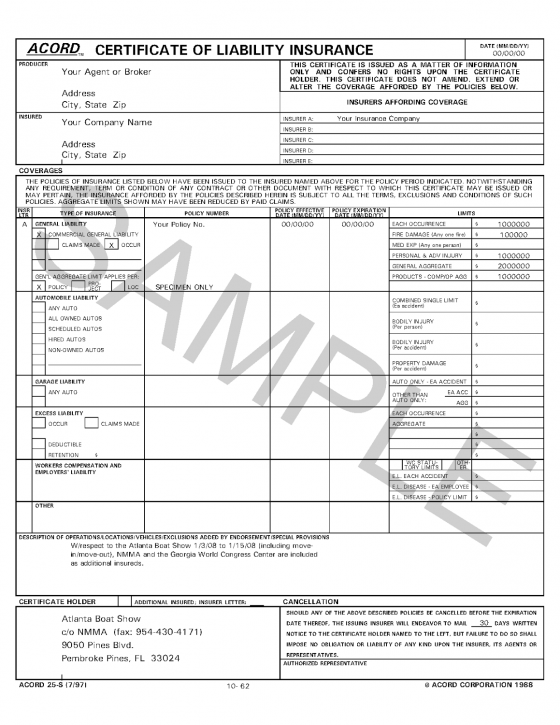

Fields:
Key: OCCUM, Value: X
Key: CLAIMS MADE, Value: NOT_SELECTED
Key: OCCUA, Value: NOT_SELECTED
Key: LOC, Value: SELECTED
Key: ANY AUTO, Value: NOT_SELECTED
Key: DEDUCTIBLE, Value: NOT_SELECTED
Key: AUTOS, Value: NOT_SELECTED
Key: MY AUTO, Value: NOT_SELECTED
Key: ALL OWNED AUTOS, Value: NOT_SELECTED
Key: PRO 2101, Value: NOT_SELECTED
Key: CLAMS MADE, Value: NOT_SELECTED
Key: SCHEDULED AUTOS, Value: NOT_SELECTED
Key: FOLICY, Value: X
Key: NON-OWNED AUTOS, Value: NOT_SELECTED
Key: DENERAL, Value: SELECTED
Key: RETENTION, Value: NOT_SELECTED
Key: PRODUCER, Value: Your Agent or Broker Address City, State Zip
Key: INSURED, Value: Your Company Name Address City, State Zip
Key: INSURER @, Value: None
Key: COMBINED SINGLE LIMIT le scodenti, Value: .
Key: ADDITIONAL INSURED INSUBER LETTEA, Value: NOT_SELECTED
Key: INSURERC, Value: None
Key: PROPERTY DAMAGE Per accident, Value: ,
Key: TO, Value: None
Key: WORKERS COMPENSATION AND EMPLOVERS LIABAITY, Value: None
Key: OTHER, Value: None
Key: I

In [130]:
# Document
display(Image(filename=documentName))
# Read document content
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

# Call Amazon Textract
response = textract.analyze_document(Document={'Bytes': imageBytes}, FeatureTypes=["FORMS"])

doc = Document(response)

for page in doc.pages:
    # Print fields
    print("Fields:")
    for field in page.form.fields:
        print("Key: {}, Value: {}".format(field.key, field.value))

In [131]:
print("JSON Response\n===================")
display(response)

JSON Response


{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 1.0,
     'Height': 0.9993103742599487,
     'Left': 0.0,
     'Top': 0.0},
    'Polygon': [{'X': 1.5854802411375396e-16, 'Y': 0.0},
     {'X': 1.0, 'Y': 0.0},
     {'X': 1.0, 'Y': 0.9993103742599487},
     {'X': 0.0, 'Y': 0.9993103742599487}]},
   'Id': 'd35bf03c-4416-4c3e-a212-ca4fc793fe71',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['442c4505-a98c-4e91-8da3-ed0cfe0d53aa',
      '13a37135-9d4f-4af9-97e1-03a012b61468',
      '5c6c480f-c16f-483a-ba1d-72a8e828986f',
      '4ebab0e2-4bbf-4f02-b191-c0821d9a13b8',
      '7408c4e7-a815-4f7f-8ac5-bfd45feb1b7b',
      '338e6c7e-0370-4bf6-b5e6-d01f57c034b8',
      '85b257f8-810e-4866-b5d0-ff437398dbec',
      '79d2d664-02b4-41a3-9956-f41d79ec2e95',
      '6b7b9a88-8661-473e-b648-a2b521c266a1',
      '8057804f-d5d5-42a7-84a3-c41f63b5d2f6',
      'bdec6ae7-1ffd-4b7f-ac32-7c6889aa47cf',
      '8206eb3c-b2e6-434a-9a03-d5661e827408

https://github.com/aws-samples/amazon-textract-response-parser

https://github.com/aws-samples/amazon-textract-response-parser/blob/master/src-python/trp.py